In [1]:
global path # 路徑設定
if sc.master == 'local': # 判斷執行模式
    path = "file:/home/user/Downloads/"
else:
    path = "hdfs://master:9000/user/user/data"
    
    
print(path)

hdfs://master:9000/user/user/data


In [2]:
df_training = spark.read.options(header = False, inferSchema = True).csv(path+"/mnist_train.csv") # 讀取train dataset

In [3]:
df_training.count() # 統計總資料數

60000

In [4]:
print("No of columns: {0} \n\n {1}".format(len(df_training.columns), df_training.columns)) # 印出columns list[_c0:label, _c1~_c785:features]

No of columns: 785 

 ['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', '_c33', '_c34', '_c35', '_c36', '_c37', '_c38', '_c39', '_c40', '_c41', '_c42', '_c43', '_c44', '_c45', '_c46', '_c47', '_c48', '_c49', '_c50', '_c51', '_c52', '_c53', '_c54', '_c55', '_c56', '_c57', '_c58', '_c59', '_c60', '_c61', '_c62', '_c63', '_c64', '_c65', '_c66', '_c67', '_c68', '_c69', '_c70', '_c71', '_c72', '_c73', '_c74', '_c75', '_c76', '_c77', '_c78', '_c79', '_c80', '_c81', '_c82', '_c83', '_c84', '_c85', '_c86', '_c87', '_c88', '_c89', '_c90', '_c91', '_c92', '_c93', '_c94', '_c95', '_c96', '_c97', '_c98', '_c99', '_c100', '_c101', '_c102', '_c103', '_c104', '_c105', '_c106', '_c107', '_c108', '_c109', '_c110', '_c111', '_c112', '_c113', '_c114', '_c115', '_c116', '_c117', '_c118', '_c119', '_c120'

In [6]:
df_training.take(1) # 印出第一筆資料內容

[Row(_c0=5, _c1=0, _c2=0, _c3=0, _c4=0, _c5=0, _c6=0, _c7=0, _c8=0, _c9=0, _c10=0, _c11=0, _c12=0, _c13=0, _c14=0, _c15=0, _c16=0, _c17=0, _c18=0, _c19=0, _c20=0, _c21=0, _c22=0, _c23=0, _c24=0, _c25=0, _c26=0, _c27=0, _c28=0, _c29=0, _c30=0, _c31=0, _c32=0, _c33=0, _c34=0, _c35=0, _c36=0, _c37=0, _c38=0, _c39=0, _c40=0, _c41=0, _c42=0, _c43=0, _c44=0, _c45=0, _c46=0, _c47=0, _c48=0, _c49=0, _c50=0, _c51=0, _c52=0, _c53=0, _c54=0, _c55=0, _c56=0, _c57=0, _c58=0, _c59=0, _c60=0, _c61=0, _c62=0, _c63=0, _c64=0, _c65=0, _c66=0, _c67=0, _c68=0, _c69=0, _c70=0, _c71=0, _c72=0, _c73=0, _c74=0, _c75=0, _c76=0, _c77=0, _c78=0, _c79=0, _c80=0, _c81=0, _c82=0, _c83=0, _c84=0, _c85=0, _c86=0, _c87=0, _c88=0, _c89=0, _c90=0, _c91=0, _c92=0, _c93=0, _c94=0, _c95=0, _c96=0, _c97=0, _c98=0, _c99=0, _c100=0, _c101=0, _c102=0, _c103=0, _c104=0, _c105=0, _c106=0, _c107=0, _c108=0, _c109=0, _c110=0, _c111=0, _c112=0, _c113=0, _c114=0, _c115=0, _c116=0, _c117=0, _c118=0, _c119=0, _c120=0, _c121=0, _c122=0

In [7]:
feature_columns = ["_c" + str(i+1) for i in range(784)] # 取出feature columns
print(feature_columns)

['_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', '_c33', '_c34', '_c35', '_c36', '_c37', '_c38', '_c39', '_c40', '_c41', '_c42', '_c43', '_c44', '_c45', '_c46', '_c47', '_c48', '_c49', '_c50', '_c51', '_c52', '_c53', '_c54', '_c55', '_c56', '_c57', '_c58', '_c59', '_c60', '_c61', '_c62', '_c63', '_c64', '_c65', '_c66', '_c67', '_c68', '_c69', '_c70', '_c71', '_c72', '_c73', '_c74', '_c75', '_c76', '_c77', '_c78', '_c79', '_c80', '_c81', '_c82', '_c83', '_c84', '_c85', '_c86', '_c87', '_c88', '_c89', '_c90', '_c91', '_c92', '_c93', '_c94', '_c95', '_c96', '_c97', '_c98', '_c99', '_c100', '_c101', '_c102', '_c103', '_c104', '_c105', '_c106', '_c107', '_c108', '_c109', '_c110', '_c111', '_c112', '_c113', '_c114', '_c115', '_c116', '_c117', '_c118', '_c119', '_c120', '_c121', '_c122', '_c123', 

In [8]:
from pyspark.ml.feature import VectorAssembler

In [9]:
vectorizer = VectorAssembler(inputCols=feature_columns, outputCol="features") # 利用VectorAssembler取出features
training = vectorizer.transform(df_training).select("_c0", "features").toDF("label", "features").cache() # 轉換為lable與features的新Dataframe
training.first().features.toArray() # 印出第一筆取出後的features

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

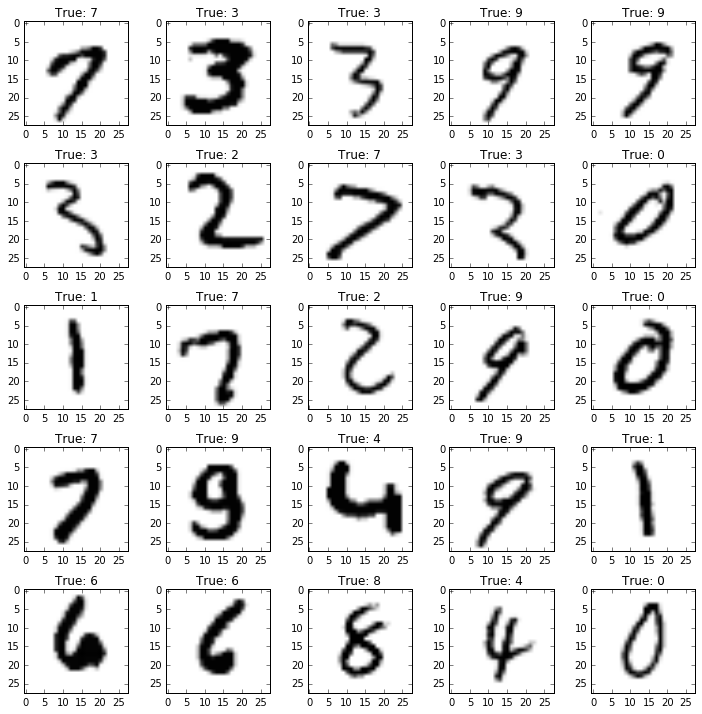

In [10]:
import matplotlib.pyplot as plt # 視覺化feature data
%matplotlib inline

images = training.sample(False, 0.01, 1).take(25)
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
for i, ax in enumerate(fig.axes):
    r = images[i]
    label = r.label
    features = r.features
    ax.imshow(features.toArray().reshape(28, 28), cmap = "Greys")
    ax.set_title("True: " + str(label))

plt.tight_layout()


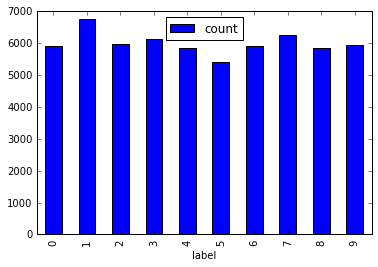

In [11]:
import pandas as pd
counts = training.groupBy("label").count() # 統計各個類別的資料數
counts.collect()
counts_df = counts.rdd.map(lambda r: {"label": r['label'], 
                                     "count": r['count']}).collect()
pd.DataFrame(counts_df).set_index("label").sort_index().plot.bar() # 視覺化結果

In [12]:
df_testing = spark.read.options(header = False, inferSchema = True).csv(path+"/mnist_test.csv") # 取test dataset
testing = vectorizer.transform(df_testing).select("_c0", "features").toDF("label", "features").cache() # 印出columns list[_c0:label, _c1~_c785:features]
testing.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    7|(784,[202,203,204...|
|    2|(784,[94,95,96,97...|
|    1|(784,[128,129,130...|
|    0|(784,[124,125,126...|
|    4|(784,[150,151,159...|
|    1|(784,[156,157,158...|
|    4|(784,[149,150,151...|
|    9|(784,[179,180,181...|
|    5|(784,[129,130,131...|
|    9|(784,[209,210,211...|
|    0|(784,[123,124,125...|
|    6|(784,[94,95,96,97...|
|    9|(784,[208,209,210...|
|    0|(784,[152,153,154...|
|    1|(784,[125,126,127...|
|    5|(784,[124,125,126...|
|    9|(784,[179,180,181...|
|    7|(784,[200,201,202...|
|    3|(784,[118,119,120...|
|    4|(784,[158,159,185...|
+-----+--------------------+
only showing top 20 rows



In [13]:
df_testing.count() # 統計總資料數

10000

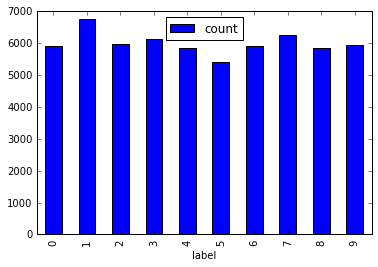

In [14]:
counts = training.groupBy("label").count() # 統計各個類別的資料數
counts.collect()
counts_df = counts.rdd.map(lambda r: {"label": r['label'], 
                                     "count": r['count']}).collect()
pd.DataFrame(counts_df).set_index("label").sort_index().plot.bar() # 視覺化結果

In [15]:
from pyspark.ml.classification import MultilayerPerceptronClassifier # load MLlib的神經網路套件
from pyspark.ml.evaluation import MulticlassClassificationEvaluator # 多類別分類評估器
from pyspark.sql.functions import *

In [15]:
# 神經網路
layers = [784, 128, 128, 128, 10] # 建立input_layer = 784, hidden layer = 128 *3, oupt_layer = 10
perceptron = MultilayerPerceptronClassifier(maxIter=150, layers=layers, blockSize=128, seed=22) # 訓練模型 epoch = 150
perceptron_model = perceptron.fit(training)

In [16]:
test_pred = perceptron_model.transform(testing).withColumn("matched", expr("label == prediction")) # 預測test data
test_pred.show() # 印出預測結果

+-----+--------------------+----------+-------+
|label|            features|prediction|matched|
+-----+--------------------+----------+-------+
|    7|(784,[202,203,204...|       7.0|   true|
|    2|(784,[94,95,96,97...|       2.0|   true|
|    1|(784,[128,129,130...|       1.0|   true|
|    0|(784,[124,125,126...|       0.0|   true|
|    4|(784,[150,151,159...|       4.0|   true|
|    1|(784,[156,157,158...|       1.0|   true|
|    4|(784,[149,150,151...|       4.0|   true|
|    9|(784,[179,180,181...|       9.0|   true|
|    5|(784,[129,130,131...|       6.0|  false|
|    9|(784,[209,210,211...|       9.0|   true|
|    0|(784,[123,124,125...|       0.0|   true|
|    6|(784,[94,95,96,97...|       6.0|   true|
|    9|(784,[208,209,210...|       9.0|   true|
|    0|(784,[152,153,154...|       0.0|   true|
|    1|(784,[125,126,127...|       1.0|   true|
|    5|(784,[124,125,126...|       5.0|   true|
|    9|(784,[179,180,181...|       9.0|   true|
|    7|(784,[200,201,202...|       7.0| 

In [17]:
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="accuracy") # acc 評估器
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label",
                                                 predictionCol="prediction", 
                                                 metricName="f1") # f1 score 評估器
evaluator_pre = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="weightedPrecision") # Precision 評估器
evaluator_rec = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="weightedRecall") # Recall 評估器

In [18]:
print("The accucry of model : {0}".format(evaluator_acc.evaluate(test_pred)))
print("The f1 score of model : {0}".format(evaluator_f1.evaluate(test_pred)))
print("The precision of model : {0}".format(evaluator_pre.evaluate(test_pred)))
print("The Recall of model : {0}".format(evaluator_rec.evaluate(test_pred)))

The accucry of model : 0.9413
The f1 score of model : 0.9412036137318909
The precision of model : 0.9412608877290011
The Recall of model : 0.9412999999999999


In [19]:
test_pred.withColumn("matched", expr("cast(matched as int)")).groupby("label").agg(avg("matched")).orderBy("label").show() # 印出各類別的預測準確度

+-----+------------------+
|label|      avg(matched)|
+-----+------------------+
|    0|0.9785714285714285|
|    1|0.9850220264317181|
|    2|0.9408914728682171|
|    3|0.9386138613861386|
|    4|0.9378818737270875|
|    5|0.9024663677130045|
|    6|0.9582463465553236|
|    7| 0.943579766536965|
|    8|0.9137577002053389|
|    9|0.9048562933597621|
+-----+------------------+



In [16]:
from pyspark.ml.classification import RandomForestClassifier # load MLlib的隨機森林 

In [17]:
# 隨機森林
rand_model = RandomForestClassifier(numTrees=150, maxDepth=10, labelCol="label", seed=42).fit(training) # 建立150棵樹, 最大深度為10 
test_pred = rand_model.transform(testing).withColumn("matched", expr("label == prediction")) # 預測test data
test_pred.show() # 印出預測結果

+-----+--------------------+--------------------+--------------------+----------+-------+
|label|            features|       rawPrediction|         probability|prediction|matched|
+-----+--------------------+--------------------+--------------------+----------+-------+
|    7|(784,[202,203,204...|[0.17499770283117...|[0.00116665135220...|       7.0|   true|
|    2|(784,[94,95,96,97...|[4.08605100983763...|[0.02724034006558...|       2.0|   true|
|    1|(784,[128,129,130...|[0.00808490488278...|[5.38993658852448...|       1.0|   true|
|    0|(784,[124,125,126...|[139.610501188034...|[0.93073667458689...|       0.0|   true|
|    4|(784,[150,151,159...|[0.34992040341813...|[0.00233280268945...|       4.0|   true|
|    1|(784,[156,157,158...|[0.00830638882520...|[5.53759255013393...|       1.0|   true|
|    4|(784,[149,150,151...|[0.43099406427722...|[0.00287329376184...|       4.0|   true|
|    9|(784,[179,180,181...|[0.36306721460171...|[0.00242044809734...|       9.0|   true|
|    5|(78

In [18]:
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="accuracy") # acc 評估器
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label",
                                                 predictionCol="prediction", 
                                                 metricName="f1") # f1 score 評估器
evaluator_pre = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="weightedPrecision") # Precision 評估器
evaluator_rec = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="weightedRecall") # Recall 評估器

In [19]:
print("The accucry of model : {0}".format(evaluator_acc.evaluate(test_pred)))
print("The f1 score of model : {0}".format(evaluator_f1.evaluate(test_pred)))
print("The precision of model : {0}".format(evaluator_pre.evaluate(test_pred)))
print("The Recall of model : {0}".format(evaluator_rec.evaluate(test_pred)))

The accucry of model : 0.9488
The f1 score of model : 0.9487920155013084
The precision of model : 0.9490421163365784
The Recall of model : 0.9488


In [20]:
test_pred.withColumn("matched", expr("cast(matched as int)")).groupby("label").agg(avg("matched")).orderBy("label").show() # 印出各類別的預測準確度

+-----+------------------+
|label|      avg(matched)|
+-----+------------------+
|    0|0.9877551020408163|
|    1|0.9876651982378855|
|    2|0.9418604651162791|
|    3|0.9396039603960396|
|    4|0.9338085539714868|
|    5|0.9316143497757847|
|    6|0.9707724425887265|
|    7|0.9231517509727627|
|    8|0.9332648870636551|
|    9| 0.933597621407334|
+-----+------------------+



In [21]:
from pyspark.ml.classification import LogisticRegression # load MLlib的羅吉斯回歸

In [22]:
lr = LogisticRegression(featuresCol="features", labelCol="label", regParam=0.1, elasticNetParam=0.1, maxIter=30000) # 迭代30000次
lr_model = lr.fit(training)

In [23]:
test_pred = lr_model.transform(testing).withColumn("matched", expr("label == prediction")) # 預測test data
test_pred.show() # 印出預測結果

+-----+--------------------+--------------------+--------------------+----------+-------+
|label|            features|       rawPrediction|         probability|prediction|matched|
+-----+--------------------+--------------------+--------------------+----------+-------+
|    7|(784,[202,203,204...|[0.08070480165377...|[0.01163236392094...|       7.0|   true|
|    2|(784,[94,95,96,97...|[1.25425406358767...|[0.02467764471716...|       2.0|   true|
|    1|(784,[128,129,130...|[-1.2276524471687...|[0.00751263994471...|       1.0|   true|
|    0|(784,[124,125,126...|[3.71476062530585...|[0.85536145424016...|       0.0|   true|
|    4|(784,[150,151,159...|[-0.2039270192761...|[0.04549113250992...|       4.0|   true|
|    1|(784,[156,157,158...|[-1.8454996939466...|[0.00278444647289...|       1.0|   true|
|    4|(784,[149,150,151...|[-1.7871799792661...|[0.00965258005974...|       4.0|   true|
|    9|(784,[179,180,181...|[-2.3331144616741...|[0.00711927716793...|       9.0|   true|
|    5|(78

In [24]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", 
                                               predictionCol="prediction", 
                                               metricName="accuracy")
evaluator.evaluate(test_pred)

0.8729

In [25]:
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="accuracy") # acc 評估器
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label",
                                                 predictionCol="prediction", 
                                                 metricName="f1") # f1 score 評估器
evaluator_pre = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="weightedPrecision") # Precision 評估器
evaluator_rec = MulticlassClassificationEvaluator(labelCol="label", 
                                                  predictionCol="prediction", 
                                                  metricName="weightedRecall") # Recall 評估器

In [26]:
print("The accucry of model : {0}".format(evaluator_acc.evaluate(test_pred)))
print("The f1 score of model : {0}".format(evaluator_f1.evaluate(test_pred)))
print("The precision of model : {0}".format(evaluator_pre.evaluate(test_pred)))
print("The Recall of model : {0}".format(evaluator_rec.evaluate(test_pred)))

The accucry of model : 0.8729
The f1 score of model : 0.8718941214700194
The precision of model : 0.8727732324654713
The Recall of model : 0.8728999999999999


In [27]:
test_pred.withColumn("matched", expr("cast(matched as int)")).groupby("label").agg(avg("matched")).orderBy("label").show() # 印出各類別的預測準確度

+-----+------------------+
|label|      avg(matched)|
+-----+------------------+
|    0|0.9622448979591837|
|    1|0.9718061674008811|
|    2|0.8275193798449613|
|    3|0.8772277227722772|
|    4|0.8940936863543788|
|    5|0.7600896860986547|
|    6|0.9050104384133612|
|    7|0.8735408560311284|
|    8|0.7895277207392197|
|    9|0.8453914767096135|
+-----+------------------+

